In [1]:
# Import libraries - what's wrong in  this cell??
import rasterio as rio
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import earthpy as et

# Get data
et.data.get_data("spatial-vector-lidar")
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data"))

In [2]:
# Get help -- just a reminder to check the expected parameter input types.
help(gpd.clip)

Help on function clip in module geopandas.tools.clip:

clip(gdf, mask, keep_geom_type=False)
    Clip points, lines, or polygon geometries to the mask extent.
    
    Both layers must be in the same Coordinate Reference System (CRS).
    The `gdf` will be clipped to the full extent of the clip object.
    
    If there are multiple polygons in mask, data from `gdf` will be
    clipped to the total boundary of all polygons in mask.
    
    Parameters
    ----------
    gdf : GeoDataFrame or GeoSeries
        Vector layer (point, line, polygon) to be clipped to mask.
    mask : GeoDataFrame, GeoSeries, (Multi)Polygon
        Polygon vector layer used to clip `gdf`.
        The mask's geometry is dissolved into one geometric feature
        and intersected with `gdf`.
    keep_geom_type : boolean, default False
        If True, return only geometries of original type in case of intersection
        resulting in multiple geometry types or GeometryCollections.
        If False, return all

## Open a shapefile Using Geopandas
Remember that we are working with VECTOR data this week which is different than raster data in it's structure. 
We will use GeoPandas for vector data. Geopandas data structures are very similar to pandas! they have additional spatial attributes associated with them. 


In [3]:
base_data_path = os.path.join("spatial-vector-lidar")
cali_data_path = os.path.join(base_data_path, "california")

plot_centroid_path = os.path.join(cali_data_path,
                                  "neon-sjer-site", "vector_data", "SJER_plot_centroids.shp")

# Open a shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

# View data attributes
sjer_plot_locations.head()

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


Explore your data.
You will find many of the same spatial attributes in vector data as you did 
raster data. 

In [4]:
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [5]:
# View the spatial extent of the data
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

In [6]:
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Check to see if your data are points, line or polygons
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

<AxesSubplot:>

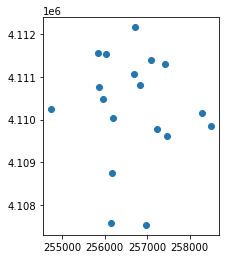

In [8]:
# You can plot directly using the .plot() method
sjer_plot_locations.plot()

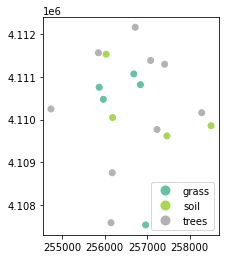

In [9]:
# Plot using Matplotlib
# Note that this works well with one layer
# But for multiple layers if you want a legend, you
# will want to create a loop to customize colors and labels
fig, ax1 = plt.subplots()
sjer_plot_locations.plot(ax=ax1,
                         column="plot_type",
                         legend=True,
                         cmap="Set2")
plt.show()

In [10]:
# View object shape
sjer_plot_locations.shape

(18, 6)

In [11]:
np.unique(sjer_plot_locations.plot_type)

array(['grass', 'soil', 'trees'], dtype=object)

To plot several layers with custom symbology, you can create a loop.

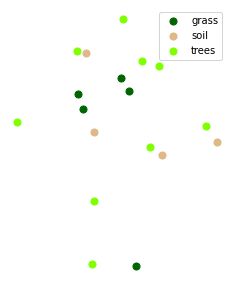

In [12]:
# Create a symbology dictionary that maps "type" to color. In this case the types are trees, grass and soil
points_symb = {'trees': 'chartreuse',
               'grass': 'darkgreen',
               'soil': 'burlywood'}

# Plot Data
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_axis_off()

# Add the plot points in sets grouped by plot_type
for ctype, sjer_plot in sjer_plot_locations.groupby('plot_type'):
    color = points_symb[ctype]
    label = ctype
    sjer_plot.plot(color=color,
                   ax=ax,
                   label=label,
                   markersize=50)

# For your homework you'll want to add roads to this plot.
# Be sure the data are in the correct CRS prior to plotting to ensure things line up!

# Add a legend
ax.legend()
plt.show()

## Challenge - break down the Plot Loop Above

Break down the  for loop above to figure out what each object in the loop  is

In [13]:
# Play around with this
for an_object in sjer_plot_locations.groupby('plot_type'):
    an_object

an_object

('trees',
      Plot_ID   Point     northing     easting plot_type  \
 0   SJER1068  center  4111567.818  255852.376     trees   
 1    SJER112  center  4111298.971  257406.967     trees   
 3    SJER117  center  4108752.026  256176.947     trees   
 5    SJER128  center  4111388.570  257078.867     trees   
 7    SJER272  center  4112167.778  256717.467     trees   
 10    SJER36  center  4110161.674  258277.829     trees   
 12    SJER37  center  4107578.841  256148.197     trees   
 13     SJER4  center  4109767.289  257228.336     trees   
 14     SJER8  center  4110249.265  254738.618     trees   
 
                           geometry  
 0   POINT (255852.376 4111567.818)  
 1   POINT (257406.967 4111298.971)  
 3   POINT (256176.947 4108752.026)  
 5   POINT (257078.867 4111388.570)  
 7   POINT (256717.467 4112167.778)  
 10  POINT (258277.829 4110161.674)  
 12  POINT (256148.197 4107578.841)  
 13  POINT (257228.336 4109767.289)  
 14  POINT (254738.618 4110249.265)  )

In [14]:
for cat, df in sjer_plot_locations.groupby('plot_type'):
    cat

cat

'trees'

## Reproject Vector Data in Python

Next let's have a look at the roads data. Remember that you are creating a map of roads and points together. 

In [15]:
# Import the data
sjer_roads_path = os.path.join(cali_data_path,
                               "madera-county-roads",
                               "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

sjer_aoi_path = os.path.join(cali_data_path,
                             "neon-sjer-site",
                             "vector_data",
                             "SJER_crop.shp")

sjer_aoi = gpd.read_file(sjer_aoi_path)

# Are the crs' the same for the two datasets?
sjer_aoi.crs, sjer_roads.crs

(<Projected CRS: EPSG:32611>
 Name: WGS 84 / UTM zone 11N
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: World - N hemisphere - 120°W to 114°W - by country
 - bounds: (-120.0, 0.0, -114.0, 84.0)
 Coordinate Operation:
 - name: UTM zone 11N
 - method: Transverse Mercator
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [16]:
# Formally that they are the same (or not)
try:
    assert sjer_aoi.crs == sjer_roads.crs
    print("The CRS' for both datasets are the same. You can clip the data")
except AssertionError as message:
    print("The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.")

The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.


 Notice that if you attempt to plot two datasets that are in different CRS' you will run into issues.
 It technically "works" but the data do not line up properly

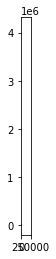

In [17]:
# Plot with the data in diff CRS
fig, ax1 = plt.subplots()
sjer_aoi.plot(ax=ax1)
sjer_roads.plot(ax=ax1)
plt.show()

In [18]:
# Reproject the data by typing out the CRS
sjer_aoi_wgs84 = sjer_aoi.to_crs(epsg=4269)

In [19]:
# Easier way if you have a layer that you want to match the CRS of
sjer_aoi_4269 = sjer_aoi.to_crs(sjer_roads.crs)

sjer_aoi_4269.crs, sjer_roads.crs

(<Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [20]:
# Formally that they are the same (or not)
try:
    assert sjer_aoi_4269.crs == sjer_roads.crs
    print("The CRS' for both datasets are the same. You can clip the data")
except AssertionError as message:
    print("The CRS' are not the same. Looks like you need to reproject one of the datasets to clip.")

The CRS' for both datasets are the same. You can clip the data


Now the data line up properly! Now you can clip the data!
A nice way to understand CRS's is to look at the numeric values associated with the x and y locations. you will
then better understand why a plot looks off (like the example above when you tried to plot two datasets in two different CRS'. They are data from the same location but the CRS differences cause issues with processing the data together.

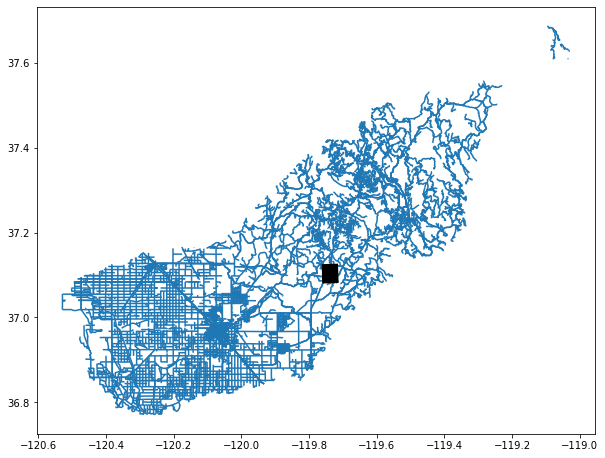

In [21]:
# plot with the data in diff CRS
fig, ax = plt.subplots(figsize=(10, 10))
# zorder to adjust the order
sjer_roads.plot(ax=ax)
sjer_aoi_4269.plot(ax=ax,
                   color="black",
                   zorder=10)
plt.show()

## Clip Data
Sometimes you will hear clip and sometimes you will here crop. the idea here is similar to what you discovered with the raster data. you can clip the data to the extent of another dataset. This is nice when you want to only work with a smaller amount of data. It can reduce processing time. It also can make a map look nicer if you are focused only on one particular region but have data outside of the region. 

<AxesSubplot:>

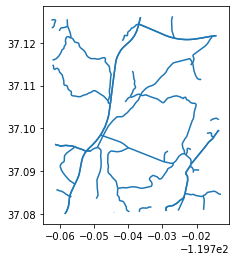

In [22]:
clipped_roads = gpd.clip(sjer_roads, sjer_aoi_wgs84)
clipped_roads.plot()

In [23]:
# Import data
country_boundary_us_path = os.path.join(base_data_path,
                                        "usa",
                                        "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join(base_data_path,
                                      "usa",
                                      "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join(base_data_path,
                               "global",
                               "ne_110m_populated_places_simple",
                               "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Do the data have the same crs?
country_boundary_us.crs, state_boundary_us.crs, pop_places.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

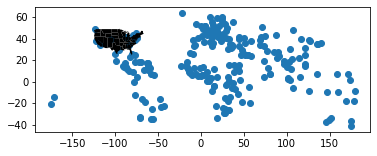

In [24]:
f, ax = plt.subplots()
pop_places.plot(ax=ax)
state_boundary_us.plot(ax=ax,
                       color="black")
plt.show()

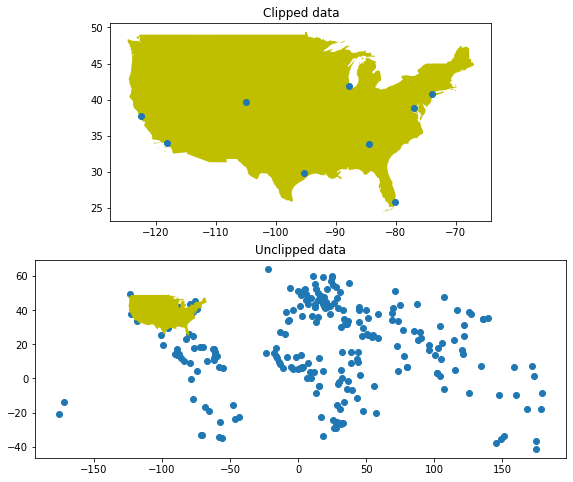

In [25]:
pop_places_clip = gpd.clip(pop_places, country_boundary_us)

# Plot the data in 2 frames or axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
country_boundary_us.plot(ax=ax1,
                         color="y")
pop_places_clip.plot(ax=ax1)
pop_places.plot(ax=ax2)
country_boundary_us.plot(ax=ax2,
                         color="y")
ax1.set_title('Clipped data')
ax2.set_title('Unclipped data')
plt.show()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


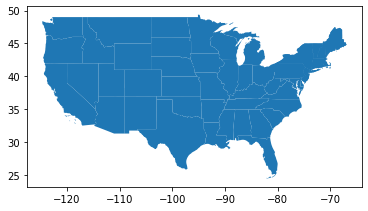

In [26]:
state_boundary_us.plot()
# View dataframe
state_boundary_us.head()

## Dissolve States to Regions Using  Spatial  Attributes




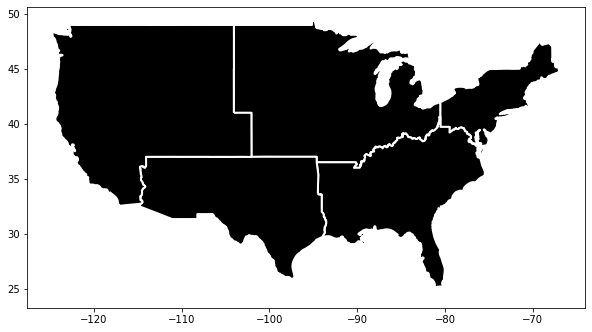

In [27]:
# Dissolve the data by the "region" column
us_regions = state_boundary_us.dissolve(by="region")

# Plot the dissolved data
us_regions.plot(color="black",
                figsize=(10, 10),
                linewidth=2,
                edgecolor="white")

plt.show()

In [28]:
us_regions['coords'] = us_regions['geometry'].apply(
    lambda x: x.representative_point().coords[:])
us_regions['coords'] = [us_regions[0] for us_regions in us_regions['coords']]
us_regions

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,coords
region,,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,"(-95.92310452006217, 42.684565030588345)"
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"(-74.89737937089166, 42.68343)"
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"(-86.98488679763418, 32.66206699999999)"
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,"(-99.89515374202875, 31.4117631435958)"
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"(-113.12995887483409, 40.7966045)"


## OPTIONAL: Add  labels to your map

We won't review this in class but  you can see how the code below works if you wish.

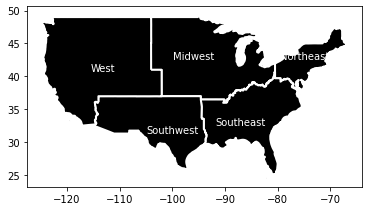

In [29]:
# Plot the dissolved data
f, ax = plt.subplots()
us_regions.plot(color="black",
                figsize=(10, 10),
                linewidth=2,
                edgecolor="white",
                ax=ax)
# This loop is ONLY if you want to  add labels
# You can ignore this code i f you dont wish to add labels to your map!
for idx, row in us_regions.reset_index().iterrows():
    plt.annotate(text=row.region,
                 xy=row.coords,
                 horizontalalignment='center',
                 color="white")
plt.show()

## Dissolve And Aggregate

When you dissolve the data, what happens to the attribute values in each column?
For each region you have 2 or more states that each have data. That data can
be summarized in different ways

You can control how the values are summarized using the `.agg` function.

In [30]:
us_regions.head()

,geometry,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,coords
region,,,,,,,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,"(-95.92310452006217, 42.684565030588345)"
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,"(-74.89737937089166, 42.68343)"
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,"(-86.98488679763418, 32.66206699999999)"
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",48,01779801,0400000US48,48,TX,Texas,00,676601887070,19059877230,"(-99.89515374202875, 31.4117631435958)"
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,"(-113.12995887483409, 40.7966045)"


In [31]:
# Aggregate the data  - calculate the mean  and sum for eachc olumn. Note that
# Some of th e columns are dropped in this  case because pythoond oesn't
# know how to summarize certain  column types
us_regions = state_boundary_us.dissolve(by="region",
                                        aggfunc=["mean", "sum"])
us_regions.head()

/Users/leahwasser/opt/miniconda3/envs/earth-analytics-python/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,geometry,"(ALAND, mean)","(ALAND, sum)","(AWATER, mean)","(AWATER, sum)"
region,,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",1.619891e+11,1943869253244,1.536528e+10,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",4.138410e+10,869066138232,5.186783e+09,108922434345
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",1.137193e+11,1364632039655,8.656388e+09,103876652998
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",3.656579e+11,1462631530997,6.054421e+09,24217682268
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",2.702596e+11,2432336444730,6.396450e+09,57568049509


In [32]:
# Create a dictionary that maps a column header to a summary type
# This allows you to be more specific about how each column is summarized
# If you wnated to summarize "ALAND" by mean and sum you can use a dictionary / list entry like this:
# "ALAND": ["mean", "sum"]

sum_type = {"ALAND": "mean",
            "AWATER": "sum",
            # Grab the first value and assign to the column
            "STATEFP": "first"}

us_regions = state_boundary_us.dissolve(by="region",
                                        aggfunc=sum_type)
us_regions.head()

,geometry,ALAND,AWATER,STATEFP
region,,,,
Midwest,"MULTIPOLYGON Z (((-87.80048 42.49192 0.00000, ...",1.619891e+11,184383393833,17
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ...",4.138410e+10,108922434345,11
Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...",1.137193e+11,103876652998,12
Southwest,"POLYGON Z ((-94.48587 33.63787 0.00000, -94.41...",3.656579e+11,24217682268,48
West,"MULTIPOLYGON Z (((-104.05325 41.00141 0.00000,...",2.702596e+11,57568049509,06


## Spatial Joins - Join Attributes From One  Shapefile To Another Shapefile

Use sjoin to join attributes to roads. In the example below, you want to assign 
each road a region name so you can summarize the roads data by region.

In [33]:
# What's wrong with this operation??
roads_region = gpd.sjoin(clipped_roads,  # The layer that you wish to add attributes to
                         us_regions,  # The layer that you wish to take attributes from
                         op="intersects") # If the geometries overlap,  then assign the attributes
roads_region.head(3)

<ipython-input-33-3136d5a019a1>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  roads_region = gpd.sjoin(clipped_roads,  # The layer that you wish to add attributes to


,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,index_right,ALAND,AWATER,STATEFP
45,110454239306,N Fork Rd,M,S1200,"LINESTRING (-119.73696 37.12441, -119.73639 37...",West,2.702596e+11,57568049509,06
311,110454242886,Old Oak Stage Pl,M,S1400,"LINESTRING (-119.71344 37.10202, -119.71344 37...",West,2.702596e+11,57568049509,06
1017,110454253915,None,None,S1400,"LINESTRING (-119.72366 37.08399, -119.72362 37...",West,2.702596e+11,57568049509,06


In [34]:
clipped_roads.crs, us_regions.crs

(<Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [35]:
us_regions_4269 = us_regions.to_crs(clipped_roads.crs)
us_regions_4269.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [36]:
roads_region = gpd.sjoin(clipped_roads,  # The layer that you wish to add attributes to
                         us_regions_4269,  # The layer that you wish to take attributes from
                         op="intersects") # If the geometries overlap,  then assign the attributes
roads_region.head(3)

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry,index_right,ALAND,AWATER,STATEFP
45,110454239306,N Fork Rd,M,S1200,"LINESTRING (-119.73696 37.12441, -119.73639 37...",West,2.702596e+11,57568049509,06
311,110454242886,Old Oak Stage Pl,M,S1400,"LINESTRING (-119.71344 37.10202, -119.71344 37...",West,2.702596e+11,57568049509,06
1017,110454253915,None,None,S1400,"LINESTRING (-119.72366 37.08399, -119.72362 37...",West,2.702596e+11,57568049509,06


<AxesSubplot:>

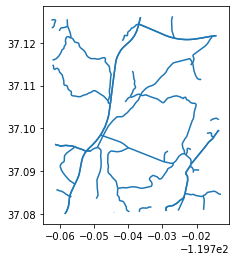

In [37]:
# Plot the roads  by region
# Note th at  each road is now assigned a region value based upon it's spatial location
roads_region.plot(column="index_right")

##  Open the Roads Layer - Complex  Geometries

Open the global roads layer. Note that this layer takes some time to plot  as
it has a lot of features in it.

<AxesSubplot:>

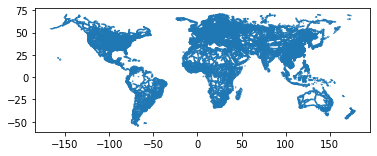

In [38]:
roads_path = os.path.join("spatial-vector-lidar",
                          "global",
                          "ne_10m_roads",
                          "ne_10m_roads.shp")
roads = gpd.read_file(roads_path)
roads.plot()

In [39]:
%time

# Clip the roads layer
country_boundary_us_sim = country_boundary_us.simplify(.2,
                                                       preserve_topology=True)
roads_cl = gpd.clip(roads,
                    country_boundary_us_sim)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [40]:
%time

# Clip the roads layer when it's not simplified - notice how much slower it is.
# NOTE - this takes a LONG time to run  so proceed with caution
# roads_cl = gpd.clip(roads,
#                     country_boundary_us)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


<AxesSubplot:>

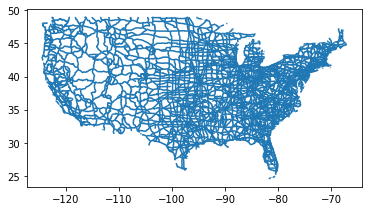

In [41]:
# Plot the clipped roads
roads_cl.plot()